# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [1]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [4]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180



Discrete metric?
Yes. Each visitor either clicked or didn’t click. That’s a binary outcome (categorical).

Large sample size?
Yes — over 1000 in each group. That’s large enough that approximations hold.

So which test?
→ Pearson’s chi-squared test is the go-to when comparing proportions in big samples.
(If you only had, say, 20 visitors per group, you’d instead use Fisher’s exact test.)

The chi-squared test works on a contingency table: it compares the observed counts of outcomes between groups to what you’d expect if there were no difference.

For this A/B test, the outcomes are clicked vs. didn’t click. Each visitor must fall into one of those two categories.

📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [ ]:
# TODO

# H0: both A and B result in equal outcomes
# H1: Test B is statistically significantly different 


- Run the Test

In [11]:
stat, p, dof, expected = chi2_contingency(data)


from scipy.stats import chi2_contingency
# clicks vs non-clicks
data = [
    [150, 1000 - 150], # A. 150 clicks, 850 non-clicks
    [180, 1050 - 180]  # B. 180 clicks, 870 non-clicks
    ]
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('H0(null): The click-through rates (CTR) of A and B are the same.')
else:
    print('H1(alternative): The CTR of A and B are different.')

p value is 0.20785388523374118
H1(alternative): The CTR of A and B are different.


> Interpret Results

In [ ]:
# TODO
# p value is 0.20785388523374118
# H1(alternative): The CTR of A and B are different.

📈 Visualization

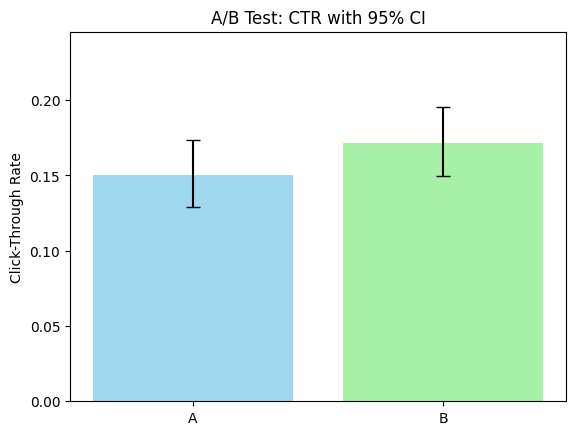

In [13]:
from statsmodels.stats.proportion import proportion_confint
# Data
clicks = np.array([150, 180])
visitors = np.array([1000, 1050])
groups = ["A", "B"]

# Compute CTRs
ctr = clicks / visitors

# 95% confidence intervals for proportions
ci_low, ci_high = proportion_confint(count=clicks, nobs=visitors, alpha=0.05, method='wilson')
ci_err = [ctr - ci_low, ci_high - ctr]  # asymmetric error bars

# Plot
fig, ax = plt.subplots()
ax.bar(groups, ctr, yerr=ci_err, capsize=5, color=["skyblue", "lightgreen"], alpha=0.8)
ax.set_ylabel("Click-Through Rate")
ax.set_title("A/B Test: CTR with 95% CI")
ax.set_ylim(0, max(ci_high) + 0.05)  # add some headroom
plt.show()

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [2]:
### Import Libraries

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [ ]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # Download from Kaggle first!

📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [ ]:
# TODO
# Insert your code HERE

> Statistical Test

In [ ]:
# TODO
# Insert your code HERE

#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

In [ ]:
# TODO
# Insert your code HERE

>Visualize Resultsm

In [ ]:
# TODO
# Insert your code HERE

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [ ]:
# Import Libraries

In [ ]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [ ]:
# TODO
# Insert your code HERE

> Statistical Test

In [ ]:
# TODO
# Insert your code HERE

📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [ ]:
# TODO
# Insert your code HERE

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [ ]:
# TODO
# Insert your code HERE

Enjoy & Happy A/B Testing :) ......!